# 1. Instalacja i pobranie zależności

# Cel
Zbudowanie modelu który wykryje kręgosłup oraz kręgi

In [54]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==1.8.1+cu111

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [56]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
# Uczenie modelu
!cd yolov5 && python train.py --img 300 --batch 8 --epochs 100 --data scoliosis_high_res_bounding_box/data.yaml --weights yolov5s.pt --patience 30

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 7/7 [00:04<00:00,  1.77it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 7/7 [00:04<00:00,  1.49it/s]
                   all        100        100       0.99      0.958       0.96      0.562

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/109 [00:00<?, ?it/s]C:\Users\jakub\OneDrive\Dokumenty\GitHub\Image-processing-and-computer-vision\notebooks\yolov5\train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.aut

In [4]:
# Ładowanie stworzonego modelu
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jakub/.cache\torch\hub\master.zip
YOLOv5  2024-11-28 Python-3.10.10 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [10]:
import  os
img = os.path.join('C:\\Users\\jakub\\OneDrive\\Dokumenty\\GitHub\\Image-processing-and-computer-vision\\notebooks\\yolov5\\scoliosis_high_res_bounding_box\\valid\\images\\2015_AYBALA_AYSEGUL_CELIK_21-06-2016-2-KORSE_PA150001_JPG_jpg.rf.346ed24edb783fc3dc4719a130f96395.jpg')

In [11]:
results = model(img)

C:\Users\jakub/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [12]:
results.print()

image 1/1: 120x60 1 scoliosis spine
Speed: 47.6ms pre-process, 591.4ms inference, 16.0ms NMS per image at shape (1, 3, 640, 320)


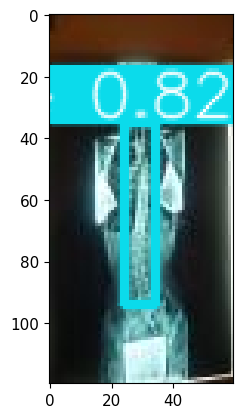

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 